In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests
from citipy import citipy
from config2 import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu kamal
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | bom jardim
Processing Record 4 of Set 1 | pitimbu
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | novikovo
Processing Record 12 of Set 1 | mahibadhoo
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | capreol
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | port-cartier
Processing Record 23 of Set 1 | morondava
Proce

Processing Record 39 of Set 4 | berbera
Processing Record 40 of Set 4 | eruwa
Processing Record 41 of Set 4 | haines junction
Processing Record 42 of Set 4 | penzance
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | boende
Processing Record 46 of Set 4 | brainerd
Processing Record 47 of Set 4 | bogovarovo
Processing Record 48 of Set 4 | verkhnyaya inta
Processing Record 49 of Set 4 | toliary
City not found. Skipping...
Processing Record 50 of Set 4 | dubbo
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | yandoon
City not found. Skipping...
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | byron bay
Processing Record 8 of Set 5 | nouadhibou
Processing Record 9 of Set 5 | port moresby
Processing Record 10 of Set 5 | presidencia r

Processing Record 27 of Set 8 | loandjili
Processing Record 28 of Set 8 | belaya gora
Processing Record 29 of Set 8 | chotila
Processing Record 30 of Set 8 | gaya
Processing Record 31 of Set 8 | king city
Processing Record 32 of Set 8 | sharlyk
Processing Record 33 of Set 8 | isabela
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | howard springs
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | genc
Processing Record 39 of Set 8 | kasongo
Processing Record 40 of Set 8 | ipixuna
Processing Record 41 of Set 8 | bazaliya
Processing Record 42 of Set 8 | hongjiang
Processing Record 43 of Set 8 | speedway
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | north bend
Processing Record 46 of Set 8 | sarahan
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | aripuana
Processing Record 49 of Set 8 | marawi
Processing Record 50 of Set 8 | tumannyy
City not f

Processing Record 13 of Set 12 | sioux lookout
Processing Record 14 of Set 12 | dudinka
Processing Record 15 of Set 12 | ughelli
Processing Record 16 of Set 12 | ilebo
Processing Record 17 of Set 12 | ligayan
Processing Record 18 of Set 12 | vanavara
Processing Record 19 of Set 12 | superior
Processing Record 20 of Set 12 | kilindoni
Processing Record 21 of Set 12 | lubumbashi
Processing Record 22 of Set 12 | asau
Processing Record 23 of Set 12 | dano
Processing Record 24 of Set 12 | abdulino
Processing Record 25 of Set 12 | mabaruma
Processing Record 26 of Set 12 | awbari
Processing Record 27 of Set 12 | phultala
Processing Record 28 of Set 12 | tabuk
Processing Record 29 of Set 12 | palembang
Processing Record 30 of Set 12 | kasempa
Processing Record 31 of Set 12 | port saint lucie
Processing Record 32 of Set 12 | campo formoso
Processing Record 33 of Set 12 | mendahara
City not found. Skipping...
Processing Record 34 of Set 12 | taltal
Processing Record 35 of Set 12 | louisbourg
Cit

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abu Kamal,34.4506,40.9171,53.49,42,0,4.70,SY,2022-03-29 01:21:34
1,Mar Del Plata,-38.0023,-57.5575,67.87,80,0,20.00,AR,2022-03-29 01:21:34
2,Bom Jardim,-7.7958,-35.5872,72.30,95,95,3.71,BR,2022-03-29 01:21:34
3,Pitimbu,-7.4706,-34.8086,79.39,77,100,9.26,BR,2022-03-29 01:21:35
4,Kapaa,22.0752,-159.3190,79.20,71,40,8.05,US,2022-03-29 01:17:02
5,Castro,-24.7911,-50.0119,62.38,99,17,8.12,BR,2022-03-29 01:21:35
6,Rikitea,-23.1203,-134.9692,78.30,67,69,1.30,PF,2022-03-29 01:21:36
7,Ushuaia,-54.8000,-68.3000,44.26,65,75,6.91,AR,2022-03-29 01:21:36
8,Mataura,-46.1927,168.8643,67.98,55,89,0.92,NZ,2022-03-29 01:21:36
9,Hobart,-42.8794,147.3294,69.22,67,75,6.91,AU,2022-03-29 01:20:19


In [9]:
new_city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
new_city_data

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [10]:
city_data_df = city_data_df[new_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abu Kamal,SY,2022-03-29 01:21:34,34.4506,40.9171,53.49,42,0,4.70
1,Mar Del Plata,AR,2022-03-29 01:21:34,-38.0023,-57.5575,67.87,80,0,20.00
2,Bom Jardim,BR,2022-03-29 01:21:34,-7.7958,-35.5872,72.30,95,95,3.71
3,Pitimbu,BR,2022-03-29 01:21:35,-7.4706,-34.8086,79.39,77,100,9.26
4,Kapaa,US,2022-03-29 01:17:02,22.0752,-159.3190,79.20,71,40,8.05
5,Castro,BR,2022-03-29 01:21:35,-24.7911,-50.0119,62.38,99,17,8.12
6,Rikitea,PF,2022-03-29 01:21:36,-23.1203,-134.9692,78.30,67,69,1.30
7,Ushuaia,AR,2022-03-29 01:21:36,-54.8000,-68.3000,44.26,65,75,6.91
8,Mataura,NZ,2022-03-29 01:21:36,-46.1927,168.8643,67.98,55,89,0.92
9,Hobart,AU,2022-03-29 01:20:19,-42.8794,147.3294,69.22,67,75,6.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

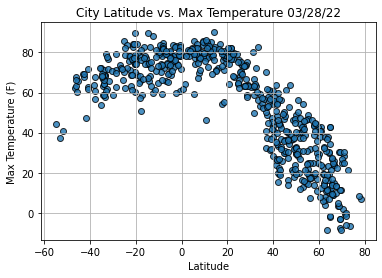

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

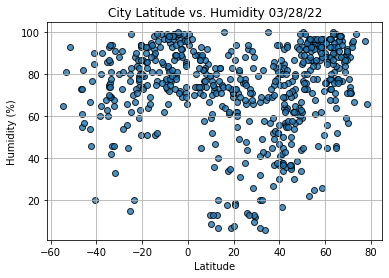

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

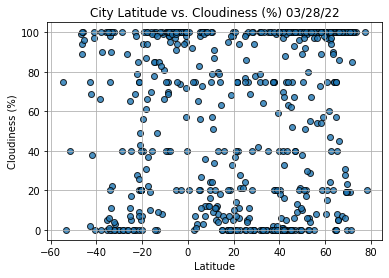

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

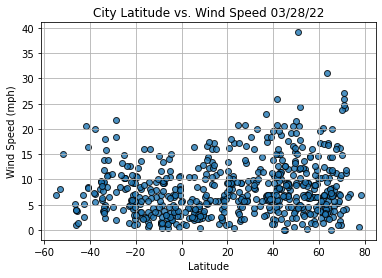

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()